In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Input, RepeatVector, Dot, Concatenate, LSTM, Bidirectional

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### RepeatVector
1. You have a vector, but requires a batch dimension
2. Only 2 dimensional vector can be passed to RepeatVector
3. Added a dimension between batch dimension and original dimension
4. If ignore batch dimension, repeat vector adds one dimension at the begining

In [2]:
dim = 12
vec = np.random.randint(1,10,size = (1, dim))
vec

array([[5, 2, 3, 6, 1, 4, 8, 7, 6, 6, 1, 2]])

In [3]:
inputs = Input(shape = (dim,))
outputs = RepeatVector(3)(inputs)
model = Model(inputs = inputs, outputs = outputs)

In [4]:
model.predict(vec)

array([[[5., 2., 3., 6., 1., 4., 8., 7., 6., 6., 1., 2.],
        [5., 2., 3., 6., 1., 4., 8., 7., 6., 6., 1., 2.],
        [5., 2., 3., 6., 1., 4., 8., 7., 6., 6., 1., 2.]]], dtype=float32)

In [5]:
model.predict(vec).shape

(1, 3, 12)

high dimensional vector rasises an error

In [6]:
# vec = np.random.randint(1,10,size = (1, dim,3))
# model.predict(vec)

## Concatenate

In [7]:
input1 = Input(shape = (dim,))
input2 = Input(shape = (dim,))
outputs = Concatenate(axis = -1)([input1, input2])
model2 = Model([input1, input2], outputs)

In [8]:
input_1_data = np.random.randint(1,10,size = (1, dim))
input_2_data = np.random.randint(1,10,size = (1, dim))
print('Input1: ', input_1_data)
print('Input2: ', input_2_data)
preds = model2.predict([input_1_data, input_2_data])
preds

Input1:  [[5 4 9 7 4 8 1 1 5 7 9 1]]
Input2:  [[8 1 3 1 2 1 2 5 8 7 3 4]]


array([[5., 4., 9., 7., 4., 8., 1., 1., 5., 7., 9., 1., 8., 1., 3., 1.,
        2., 1., 2., 5., 8., 7., 3., 4.]], dtype=float32)

In [9]:
input_1_data.shape

(1, 12)

In [10]:
preds.shape

(1, 24)

### Concate with different lengths

In [11]:
dim1 = 5
dim2 = 7

input1 = Input(shape = (dim1,))
input2 = Input(shape = (dim2,))
outputs = Concatenate(axis = -1)([input1, input2])
model3 = Model([input1, input2], outputs)

In [12]:
input_1_data = np.random.randint(1,10,size = (1, dim1))
input_2_data = np.random.randint(1,10,size = (1, dim2))
model3.predict([input_1_data, input_2_data]).shape

(1, 12)

### Multi-dimensional concatenation

You would never want to concatenate things on 0-th dimension, since it is batch dimension      
You concat things on -1 dimension mostly.        
On high dimensional data, you may concat things on specified dimension       

In [13]:
input1 = Input(shape = (dim1,dim2,))
input2 = Input(shape = (dim1,dim2,))
outputs = Concatenate(axis = 1)([input1, input2])
model4 = Model([input1, input2], outputs)

In [14]:
input_data_1 = np.random.randint(1,10,size = (1, dim1, dim2))
input_data_2 = np.random.randint(1,10,size = (1, dim1, dim2))

In [15]:
input_data_1

array([[[3, 8, 3, 7, 9, 4, 8],
        [1, 7, 2, 8, 6, 4, 4],
        [4, 2, 5, 7, 8, 4, 9],
        [6, 1, 4, 8, 3, 2, 9],
        [3, 7, 1, 2, 5, 6, 4]]])

In [16]:
input_data_2

array([[[6, 8, 7, 6, 1, 5, 5],
        [1, 6, 8, 7, 4, 5, 2],
        [4, 2, 3, 8, 1, 4, 6],
        [4, 4, 4, 7, 7, 5, 6],
        [7, 1, 4, 4, 4, 7, 3]]])

In [17]:
preds = model4.predict([input_data_1, input_data_2])
preds

array([[[3., 8., 3., 7., 9., 4., 8.],
        [1., 7., 2., 8., 6., 4., 4.],
        [4., 2., 5., 7., 8., 4., 9.],
        [6., 1., 4., 8., 3., 2., 9.],
        [3., 7., 1., 2., 5., 6., 4.],
        [6., 8., 7., 6., 1., 5., 5.],
        [1., 6., 8., 7., 4., 5., 2.],
        [4., 2., 3., 8., 1., 4., 6.],
        [4., 4., 4., 7., 7., 5., 6.],
        [7., 1., 4., 4., 4., 7., 3.]]], dtype=float32)

In [18]:
preds.shape

(1, 10, 7)

In [19]:
input1 = Input(shape = (dim1,dim2,))
input2 = Input(shape = (dim1,dim2,))
outputs = Concatenate(axis = 2)([input1, input2])
outputs_1 = Concatenate(axis = -1)([input1, input2])
model5 = Model([input1, input2], outputs)
model6 = Model([input1, input2], outputs_1)

preds = model5.predict([input_data_1, input_data_2])
preds

array([[[3., 8., 3., 7., 9., 4., 8., 6., 8., 7., 6., 1., 5., 5.],
        [1., 7., 2., 8., 6., 4., 4., 1., 6., 8., 7., 4., 5., 2.],
        [4., 2., 5., 7., 8., 4., 9., 4., 2., 3., 8., 1., 4., 6.],
        [6., 1., 4., 8., 3., 2., 9., 4., 4., 4., 7., 7., 5., 6.],
        [3., 7., 1., 2., 5., 6., 4., 7., 1., 4., 4., 4., 7., 3.]]],
      dtype=float32)

In [20]:
preds.shape

(1, 5, 14)

In [21]:
preds = model5.predict([input_data_1, input_data_2])
preds

array([[[3., 8., 3., 7., 9., 4., 8., 6., 8., 7., 6., 1., 5., 5.],
        [1., 7., 2., 8., 6., 4., 4., 1., 6., 8., 7., 4., 5., 2.],
        [4., 2., 5., 7., 8., 4., 9., 4., 2., 3., 8., 1., 4., 6.],
        [6., 1., 4., 8., 3., 2., 9., 4., 4., 4., 7., 7., 5., 6.],
        [3., 7., 1., 2., 5., 6., 4., 7., 1., 4., 4., 4., 7., 3.]]],
      dtype=float32)

In [22]:
preds.shape

(1, 5, 14)

In [23]:
model5.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 5, 7)         0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 5, 7)         0                                            
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 5, 14)        0           input_8[0][0]                    
                                                                 input_9[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [24]:
mat = np.ones((10,5))*(np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1))
mat = np.array([mat])

In [25]:
vec = np.ones((10,1))*2
vec = np.array([vec])

In [26]:
Mat = Input(shape = (10,5))
Vec = Input(shape =(10,1))
outputs = Dot(axes = 1)([Vec, Mat])
model_d = Model([Mat, Vec], outputs)

In [27]:
model_d.predict([mat,vec])

array([[[90., 90., 90., 90., 90.]]], dtype=float32)

In [37]:
mat[0]

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9.]])

In [38]:
vec[0]

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [31]:
mat.shape

(1, 10, 5)

In [35]:
np.dot(vec[0].T,mat[0])

array([[90., 90., 90., 90., 90.]])

## Tryout attention encoding

In [85]:
from keras.layers import LSTM, Dense, Input, Embedding, Bidirectional, RepeatVector, Concatenate, Dot
from keras.models import Model

In [50]:
Tx = 100
M1 = 15
D = 50
V = 10000

#### Encoder part

In [72]:
seq_input = Input(shape = (Tx, ), name = 'token_input')
embedding_layer = Embedding(V, D, input_length = Tx, name = 'embedding')
embed_input = embedding_layer(seq_input)

encoder_lstm = Bidirectional(LSTM(M1, return_sequences = True), name = 'encoder')
encoder_out = encoder_lstm(embed_input)

m = Model(inputs = seq_input, outputs = encoder_out)

In [73]:
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
token_input (InputLayer)     (None, 100)               0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 50)           500000    
_________________________________________________________________
encoder (Bidirectional)      (None, 100, 30)           7920      
Total params: 507,920
Trainable params: 507,920
Non-trainable params: 0
_________________________________________________________________


#### Decoder part

In [80]:
Ty = 80
Dd = 200
Vd = 8000
M2 = 45

In [81]:
tar_input = Input(shape = (Ty,), name = 'decoder_seq_input')
decoder_embedding = Embedding(Vd, Dd,input_length = Ty, name = 'decoder_embedding')
decoder_input_seq = decoder_embedding(tar_input)

In [82]:
m = Model(inputs = tar_input, outputs = decoder_input_seq)

In [83]:
m.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_seq_input (InputLaye (None, 80)                0         
_________________________________________________________________
decoder_embedding (Embedding (None, 80, 200)           1600000   
Total params: 1,600,000
Trainable params: 1,600,000
Non-trainable params: 0
_________________________________________________________________


#### One step attention

In [131]:
import keras.backend as K

In [140]:
def softmax_over_time(x):
    '''
        X is a 3 dimensional array: (Batch_size, Timstep, 1)
    '''
    
    assert(K.ndim(x) > 2)
    
    e = K.exp(x - K.max(x, axis = 1, keepdims = True))
    s = K.sum(e, axis = 1, keepdims = True)
    return e / s
    

In [141]:
attn_repeat_layer = RepeatVector(Tx, name = 'decoder_hidden_repeat')
attn_concat_layer = Concatenate(axis = -1, name = 'concat_over_time')

In [142]:
h = Input(shape = (Tx, 2*M1), name = 'encoder_hidden_out')
st_1 = Input(shape = (M2,), name = 'decoder_prev_step')
st_1_rpt = attn_repeat_layer(st_1)
st_1_h = attn_concat_layer([st_1_rpt, h])

In [143]:
m = Model(inputs = [st_1,h], outputs = st_1_h)
m.summary()

Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_prev_step (InputLayer)  (None, 45)           0                                            
__________________________________________________________________________________________________
decoder_hidden_repeat (RepeatVe (None, 100, 45)      0           decoder_prev_step[0][0]          
__________________________________________________________________________________________________
encoder_hidden_out (InputLayer) (None, 100, 30)      0                                            
__________________________________________________________________________________________________
concat_over_time (Concatenate)  (None, 100, 75)      0           decoder_hidden_repeat[0][0]      
                                                                 encoder_hidden_out[0][0]  

In [144]:
attn_dense1 = Dense(10,activation = 'tanh', name = 'densor1')
attn_dense2 = Dense(1, activation = softmax_over_time, name = 'densor_over_time')

In [145]:
alphas = attn_dense1(st_1_h)
alphas = attn_dense2(alphas)

In [146]:
m = Model(inputs = [st_1,h], outputs = alphas)
m.summary()

Model: "model_35"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_prev_step (InputLayer)  (None, 45)           0                                            
__________________________________________________________________________________________________
decoder_hidden_repeat (RepeatVe (None, 100, 45)      0           decoder_prev_step[0][0]          
__________________________________________________________________________________________________
encoder_hidden_out (InputLayer) (None, 100, 30)      0                                            
__________________________________________________________________________________________________
concat_over_time (Concatenate)  (None, 100, 75)      0           decoder_hidden_repeat[0][0]      
                                                                 encoder_hidden_out[0][0]  

In [147]:
from keras.utils import plot_model

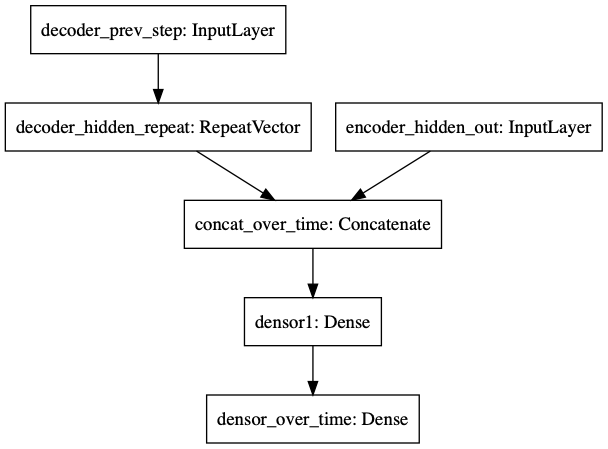

In [148]:
plot_model(m)

## The fucking dot layer

In [152]:
attn_dot = Dot(axes = 1, name = 'WA_encoder_hiddens')

In [153]:
ctx = attn_dot([alphas, h])

In [154]:
m = Model(inputs = [st_1,h], outputs = ctx)
m.summary()

Model: "model_36"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_prev_step (InputLayer)  (None, 45)           0                                            
__________________________________________________________________________________________________
decoder_hidden_repeat (RepeatVe (None, 100, 45)      0           decoder_prev_step[0][0]          
__________________________________________________________________________________________________
encoder_hidden_out (InputLayer) (None, 100, 30)      0                                            
__________________________________________________________________________________________________
concat_over_time (Concatenate)  (None, 100, 75)      0           decoder_hidden_repeat[0][0]      
                                                                 encoder_hidden_out[0][0]  

## 厉害了    
encoder_hidden_out (InputLayer) 是一个 (batch, 100, 30) 的矩阵          
densor_over_time   (Dense)      是一个 (batch, 100, 1) 的列向量          
然后 dot 一下，相当于 (1, 100) @ (100, 30) = (1, 30)           
加上一个batch维度 = (batch, 1, 30)          


**axes = 1 相当于从第一维度开始，后面的维都算，然后相乘起来**

## Always Repeat your knowledge

In [220]:
Tx = 100       # encoder input length
Ty = 200       # decoder input length
Vx = 10000     # encoder vocab size
Vy = 20000     # decoder vocab size
Dx = 300       # encoder embedding dim
Dy = 400       # decoder embedding dim
Mx = 25        # encoder hidden vector size
My = 20        # decoder hidden vector size


def encoder_block(Tx, Vx, Dx, Mx, summary = True):
    
    '''
        Encoder a sequence of tokens into a sequence of hidde vectors
    '''
    seq_input = Input(shape = (Tx,), name = 'encoder_token_input') 
    embedding_layer = Embedding(Vx, Dx, input_length = Tx, name = 'encoder_embedding')
    embedded_encoder_seq = embedding_layer(seq_input)
    encoder_lstm = Bidirectional(LSTM(Mx,return_sequences = True), name = 'encoder_lstm')
    encoder_hidden_seq = encoder_lstm(embedded_encoder_seq)
    en_m = Model(seq_input,encoder_hidden_seq,name = 'encoder_block')
    
    if summary:
        en_m.summary()
    return en_m

def decoder_input_block(Ty,Vy, Dy, summary = True):
    
    '''
        Convert a teaching forcing input into a embedding sequence
    '''

    decoder_input = Input(shape = (Ty,), name = 'teaching_forcing_input')
    embedding_layer = Embedding(Vy, Dy, input_length = Ty, name ='decoder_embedding')
    embedded_decoder_seq = embedding_layer(decoder_input)
    de_in_m = Model(inputs = decoder_input, outputs = embedded_decoder_seq, name = 'decoder_input_block')
    if summary:
        de_in_m.summary()
        
    return de_in_m

def one_step_attention(h, st_1, Tx = None, Mx = None, test_mode = True, summary = True):
    
    if test_mode:
        h = Input(shape = (Tx, 2*Mx), name = 'encoder_outputs')
        st_1 = Input(shape = (My,), name = 'decoder_prev')

    attn_repeat_layer = RepeatVector(Tx, name = 'decoder_prev_rpt')
    attn_concat_layer = Concatenate(axis = -1, name = 'concat')
    attn_dense1 = Dense(10, activation = 'tanh', name = 'attention_dense1')
    attn_dense2 = Dense(1, activation = softmax_over_time, name = 'attention_dense2')
    attn_dot = Dot(axes = 1, name = 'attention_dot')

    st_1_rpt = attn_repeat_layer(st_1)
    attn_feature = attn_concat_layer([st_1_rpt,h])
    
    # Here you shold try to remember shapes
    # attn_feature has a shape (batch_size, Tx, 2*Mx + My)
    # and you dense on last dimension
    alphas = attn_dense1(attn_feature)
    alphas = attn_dense2(alphas)
    context = attn_dot([alphas, h])

    model = Model(inputs = [h,st_1],outputs = context, name = 'attn_one_step')
    
    if summary:
        model.summary()
        
    return model

In [221]:
encoder_model = encoder_block(Tx,Vx,Dx,Mx)
print('\n'*2)
decoder_input_model = decoder_input_block(Ty,Vy,Dy)
print('\n'*2)
attn_forward_model = one_step_attention(h,st_1,Tx, Mx)

Model: "encoder_block"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_token_input (InputLa (None, 100)               0         
_________________________________________________________________
encoder_embedding (Embedding (None, 100, 300)          3000000   
_________________________________________________________________
encoder_lstm (Bidirectional) (None, 100, 50)           65200     
Total params: 3,065,200
Trainable params: 3,065,200
Non-trainable params: 0
_________________________________________________________________



Model: "decoder_input_block"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
teaching_forcing_input (Inpu (None, 200)               0         
_________________________________________________________________
decoder_embedding (Embedding (None, 200, 400)          8000000   
Total param

In [222]:
decoder_lstm = LSTM(My, return_state = True, name = 'decoder_lstm')
decoder_dense = Dense(Vy, activation = 'softmax', name = 'decoder_dense_out')